## Staging field for experimenting with dataset

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200) #total row able to be displayed in jupyter notebook
sns.set_style("whitegrid")

In [52]:
df = pd.read_csv("Aquifer_Petrignano.csv")

# Drop data before 2009 for the purpose of this tutorial
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

targets = ['Depth_to_Groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [53]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


### Staging Area

(17897.0, 18262.0)

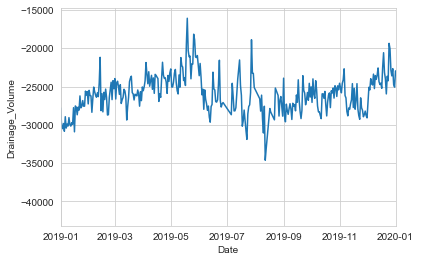

In [61]:
old = df.copy()
g = sns.lineplot(
    data = df,
    x ='Date',
    y = 'Drainage_Volume'
)
g.set_xlim([date(2019, 1, 1), date(2020, 1, 1)])

In [56]:
# Converting 0 values to null
df.Drainage_Volume = np.where(df.Drainage_Volume == 0, np.nan, df.Drainage_Volume)
df.River_Hydrometry = df.River_Hydrometry.mask(df.River_Hydrometry == 0, np.nan)

In [62]:
df.isna().value_counts()

Date   Rainfall  Depth_to_Groundwater  Temperature  Drainage_Volume  River_Hydrometry
False  False     False                 False        False            False               3996
                                                                     True                 150
                 True                  False        False            False                 27
                 False                 False        True             False                 26
dtype: int64

In [90]:
nan_values = old[old.Drainage_Volume.isna()].index.to_list()
old.iloc[nan_values, :]

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
889,2011-06-09,0.2,-23.24,19.2,NaN,2.0
890,2011-06-10,0.0,-23.28,19.1,NaN,2.0
1083,2011-12-20,0.0,-27.11,1.9,NaN,2.0
3830,2019-06-28,0.0,-25.55,29.7,NaN,2.4
3831,2019-06-29,0.0,-25.66,27.8,NaN,2.4
3832,2019-06-30,0.0,-25.71,27.1,NaN,2.4
3833,2019-07-01,0.0,-25.73,28.7,NaN,2.4
3834,2019-07-02,0.0,-25.74,29.3,NaN,2.4
3835,2019-07-03,0.0,-25.82,29.8,NaN,2.4
3836,2019-07-04,0.0,-26.00,29.0,NaN,2.3


In [86]:
df['Drainage_Volume'] = df['Drainage_Volume'].interpolate()
df['River_Hydrometry'] = df['River_Hydrometry'].interpolate()
df['Depth_to_Groundwater'] = df['Depth_to_Groundwater'].interpolate()

In [91]:
df.iloc[nan_values, :]

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
889,2011-06-09,0.2,-23.24,19.2,-27739.008,2.0
890,2011-06-10,0.0,-23.28,19.1,-29064.672,2.0
1083,2011-12-20,0.0,-27.11,1.9,-35922.960,2.0
3830,2019-06-28,0.0,-25.55,29.7,-27252.672,2.4
3831,2019-06-29,0.0,-25.66,27.8,-27429.312,2.4
3832,2019-06-30,0.0,-25.71,27.1,-27605.952,2.4
3833,2019-07-01,0.0,-25.73,28.7,-27782.592,2.4
3834,2019-07-02,0.0,-25.74,29.3,-27959.232,2.4
3835,2019-07-03,0.0,-25.82,29.8,-28135.872,2.4
3836,2019-07-04,0.0,-26.00,29.0,-28312.512,2.3


<AxesSubplot:xlabel='Date', ylabel='River_Hydrometry'>

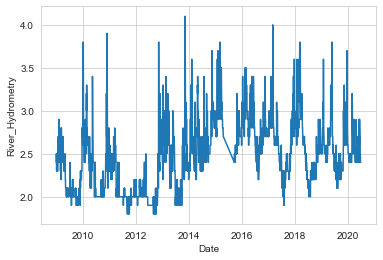

In [89]:
sns.lineplot(data= df, x='Date', y = 'River_Hydrometry')

(18017.0, 18170.0)

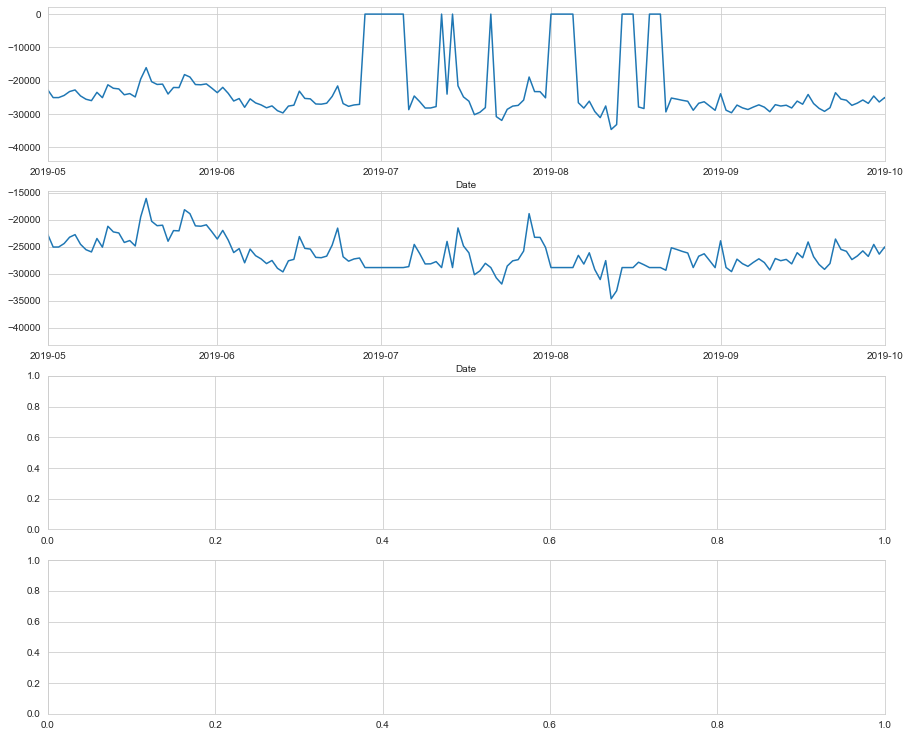

In [78]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 13))
sns.lineplot(
    data = df,
    x = df.Date,
    y = np.where(df.Drainage_Volume.isna(), 0, df.Drainage_Volume),
    ax = ax[0]
)

sns.lineplot(
    data = df,
    x = df.Date,
    y = np.where(df.Drainage_Volume.isna(), df.Drainage_Volume.mean(), df.Drainage_Volume),
    ax = ax[1]
)


ax[0].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
ax[1].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])